# End to End Machine Learning with Deployment

### Part1- EDA of Medical Dataset 
1. Import the libraries
2. Load the data and view it
3. Clean the data 
4. Perform EDA 

### Part2- Modelling of Dataset 
5. Preprocessing
6. Fitting and Evaluation
7. Optimization
8. Interpretation
9. Model Deploytment

In [4]:
%pip install xgboost --user 

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install streamlit --user


Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install imbalanced-learn --user

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install xgboost --user

Note: you may need to restart the kernel to use updated packages.


### Step1: Import the libraries


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")



print("All libraries are imported")

All libraries are imported


In [9]:
# libraries for preprocessing 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# libraries for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [10]:
%pip install sklearn
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Step2:Load the data and view it

In [11]:
data=pd.read_csv(r"C:\Users\Diwakar\Downloads\data (1).csv")

In [12]:
import pandas as pd

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [14]:
data.describe().T

count        mean         std     min        25%  \
Unnamed: 0                768.0  383.500000  221.846794   0.000  191.75000   
Pregnancies               768.0    3.845052    3.369578   0.000    1.00000   
Glucose                   768.0  120.894531   31.972618   0.000   99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000   62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000    0.00000   
Insulin                   768.0   79.799479  115.244002   0.000    0.00000   
BMI                       768.0   31.992578    7.884160   0.000   27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078    0.24375   
Age                       768.0   33.240885   11.760232  21.000   24.00000   

                               50%        75%     max  
Unnamed: 0                383.5000  575.25000  767.00  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

In [15]:
data[~data.applymap(np.isreal).any(1)]

Empty DataFrame
Columns: [Unnamed: 0, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

**Observations**
1. The dataset has 768 rows and 10 columns
2. The column 'Unnamed: 0' is redundant
3. There are no nulls 
4. However there are 0's present as null which we have to take care of
5. There are no corrupt characters

### Step3: Clean the data 

In [16]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
zerofiller=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, 0)

In [18]:
# encode the categorical outcome variable
df=data.copy()
d={"Yes":1, 'No':0}
df['Outcome']=df['Outcome'].map(d)

In [19]:
df.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

### Step4: Perform EDA 
1. Univariates- NUmerical
2. UNivariates- Categorical
3. BUvariate - Categorical vs Numerical
4. Bivariate - Numerical vs Numerical 
5. MUltivaraite Pairplot
6. Correlations and Heatmpap
7. Outcome is a binary categorical variable


In [20]:
def histograms(df):
    df.hist()
    plt.tight_layout()
    plt.show()

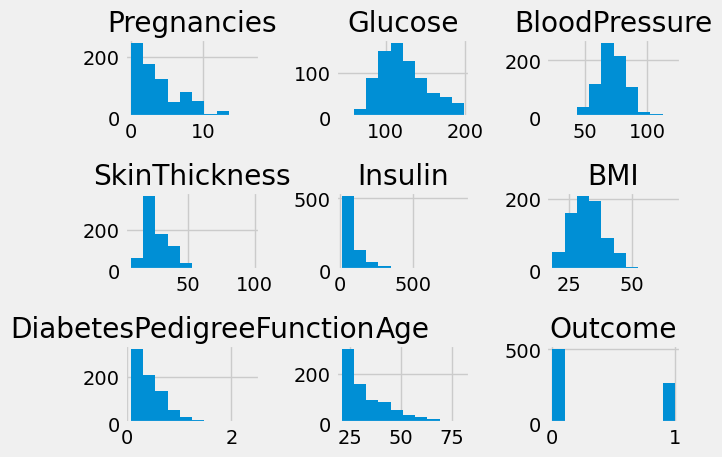

In [21]:
histograms(df)

In [22]:
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    plt.show()

Bar plot of the variable  Outcome


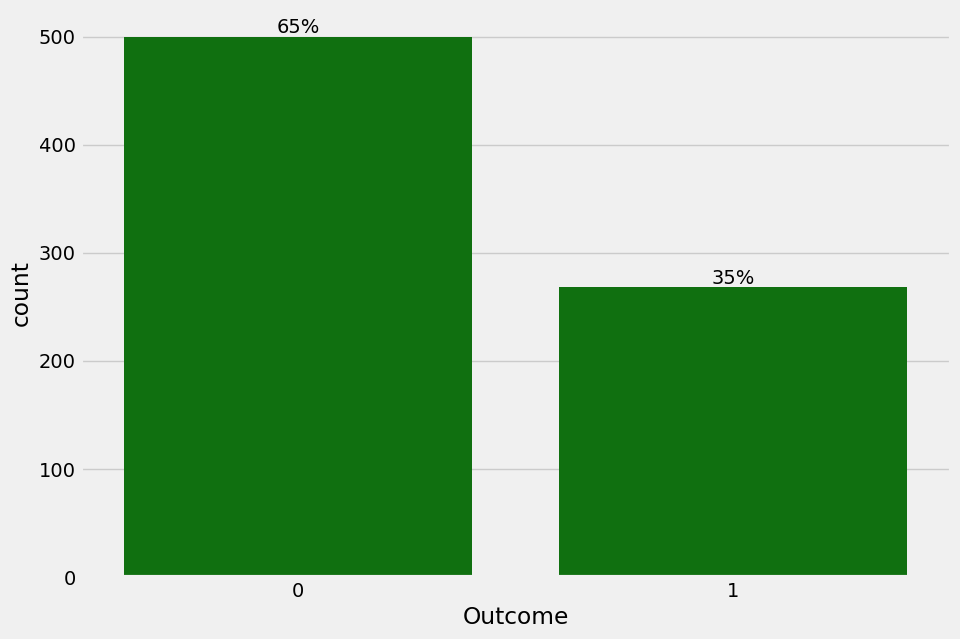

In [23]:
barplot(df, 'Outcome')

In [24]:
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()
    

Boxplot and Histplot for  Pregnancies


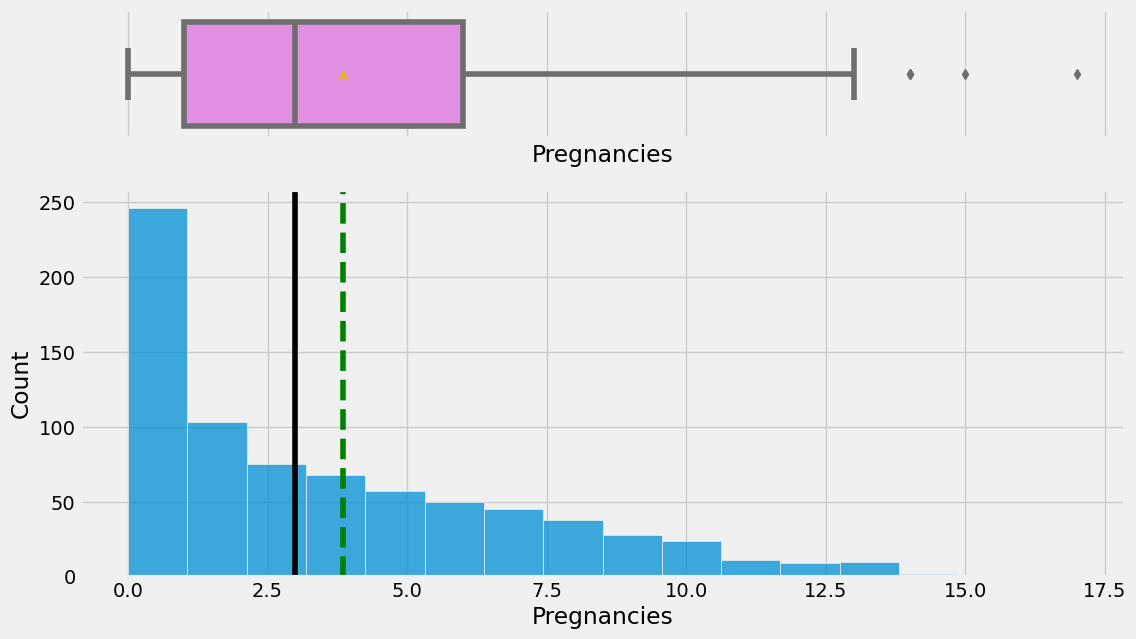

Boxplot and Histplot for  Glucose


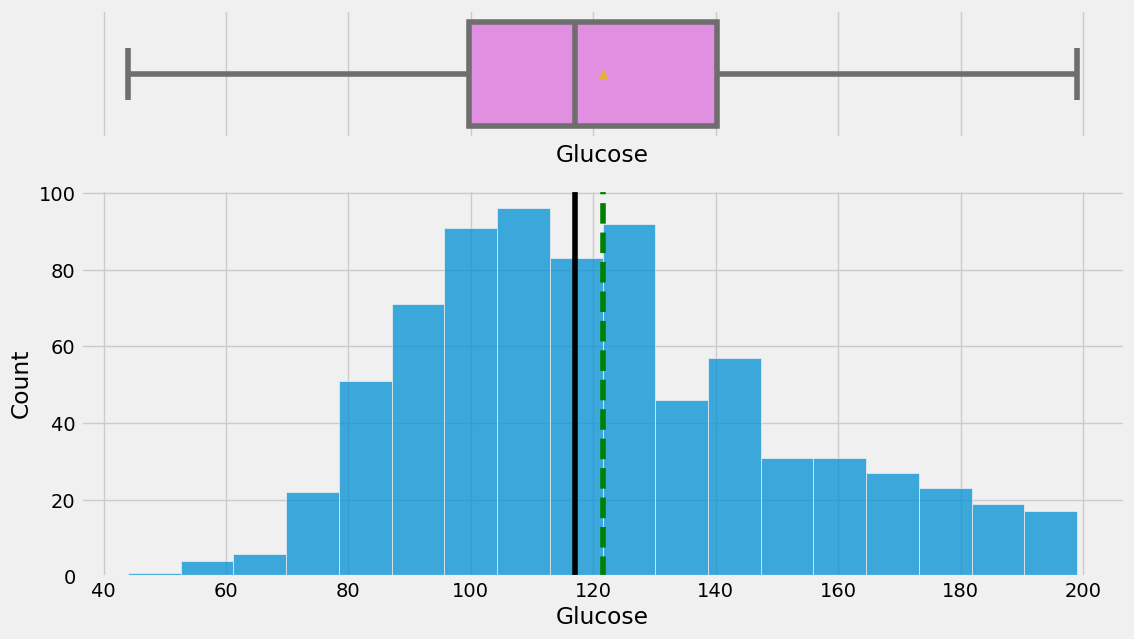

Boxplot and Histplot for  BloodPressure


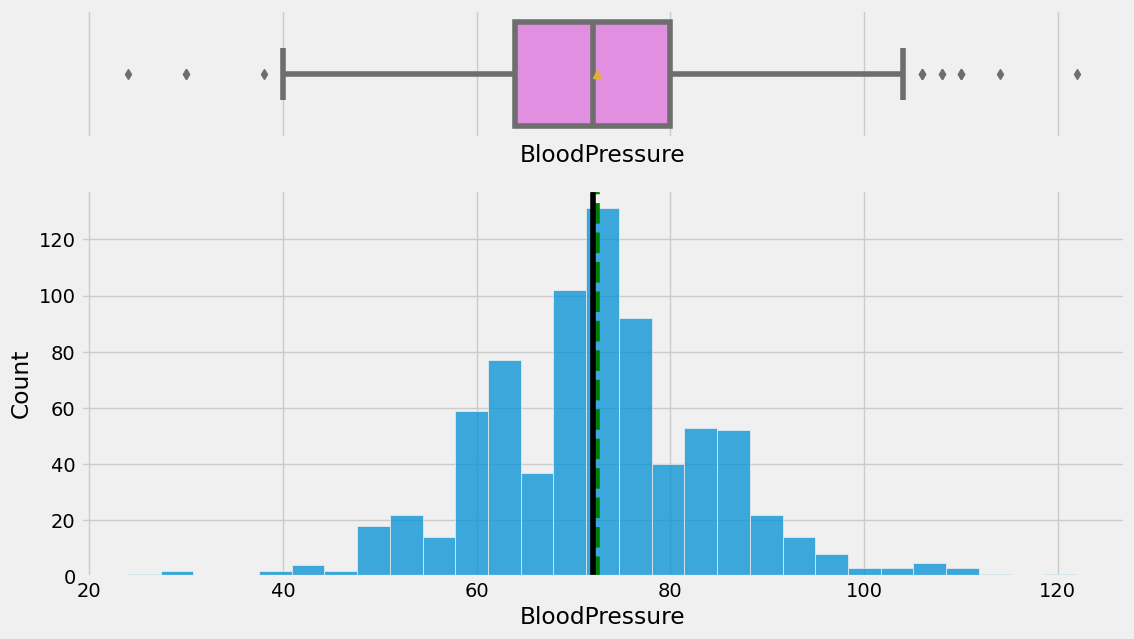

Boxplot and Histplot for  SkinThickness


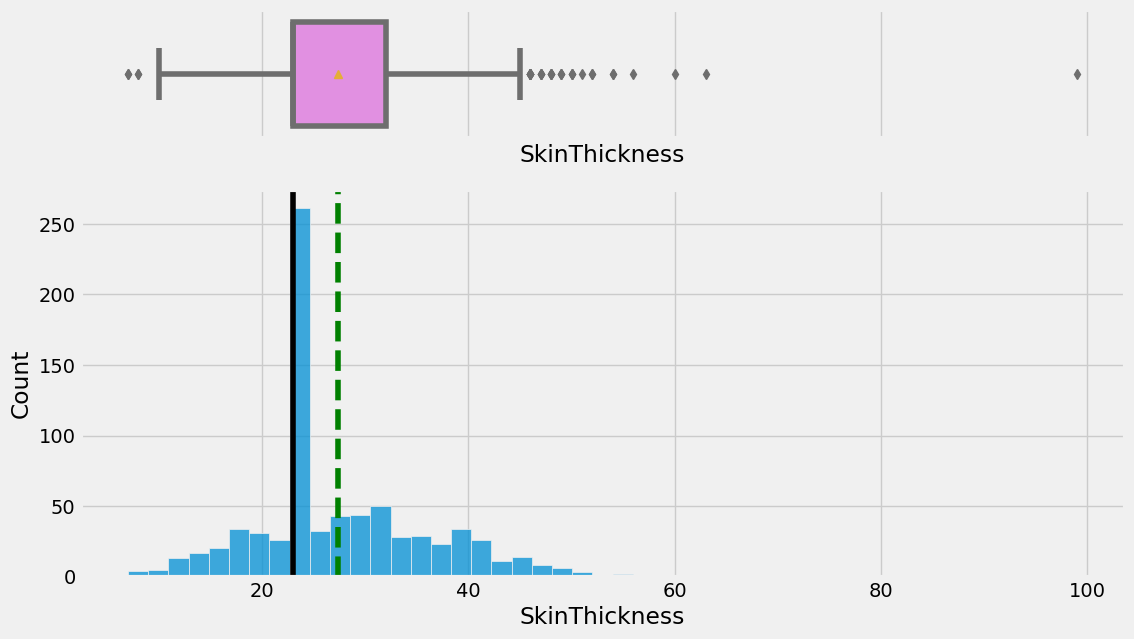

Boxplot and Histplot for  Insulin


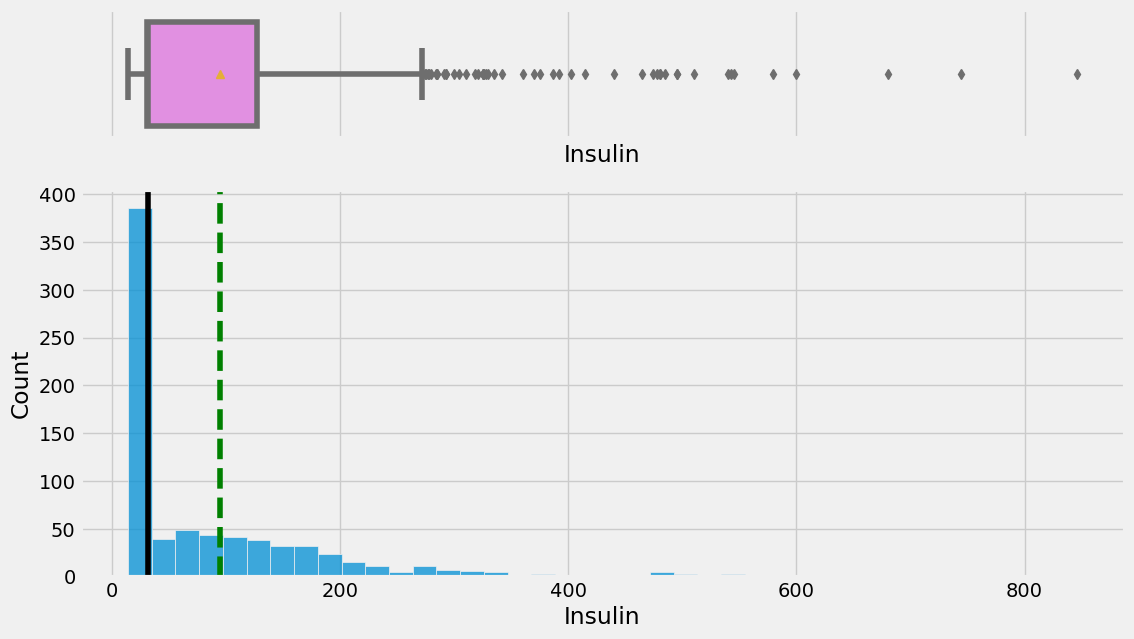

Boxplot and Histplot for  BMI


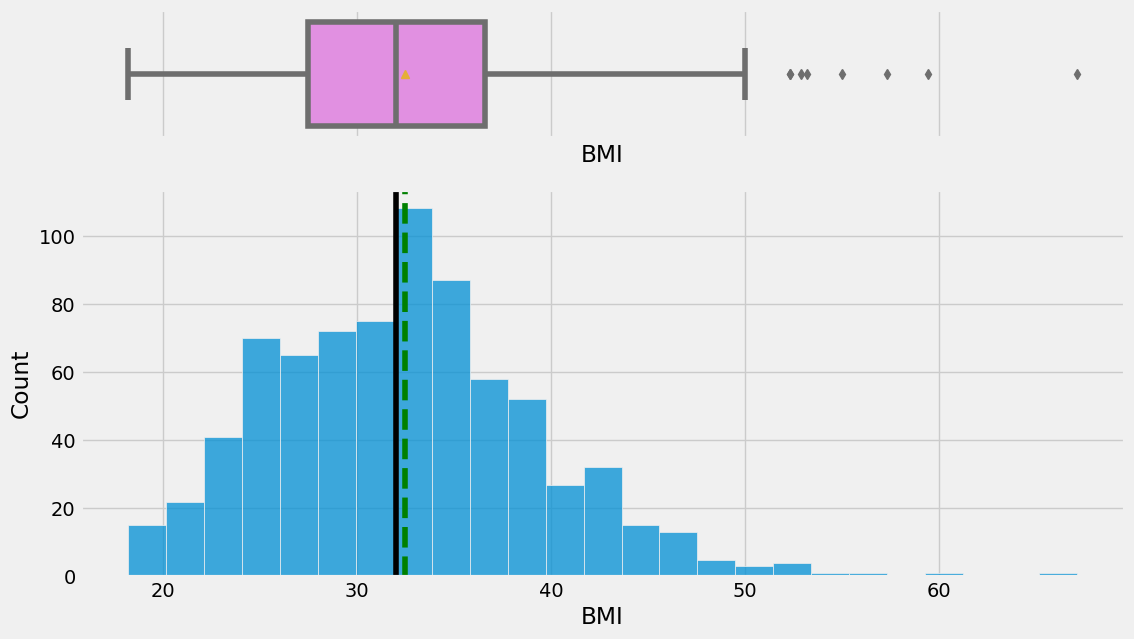

Boxplot and Histplot for  DiabetesPedigreeFunction


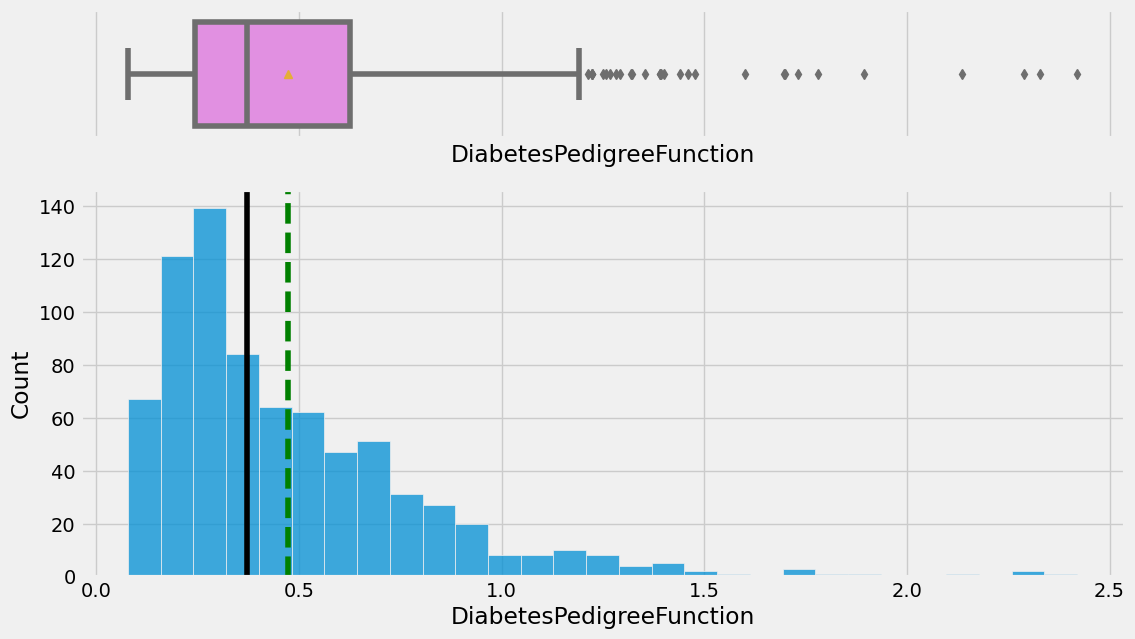

Boxplot and Histplot for  Age


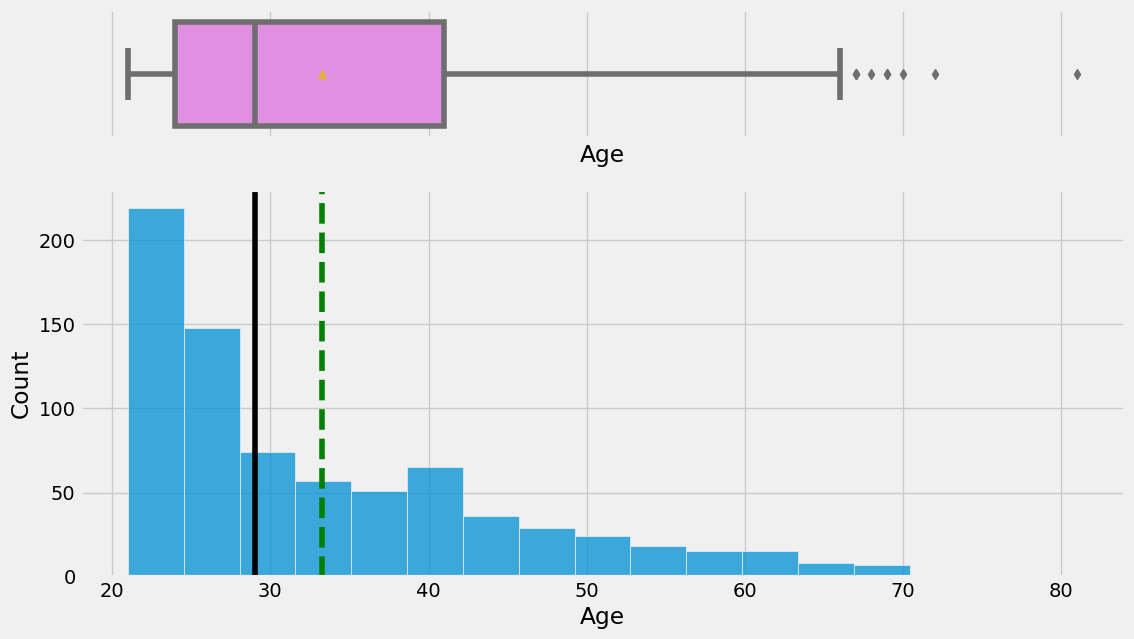

Boxplot and Histplot for  Outcome


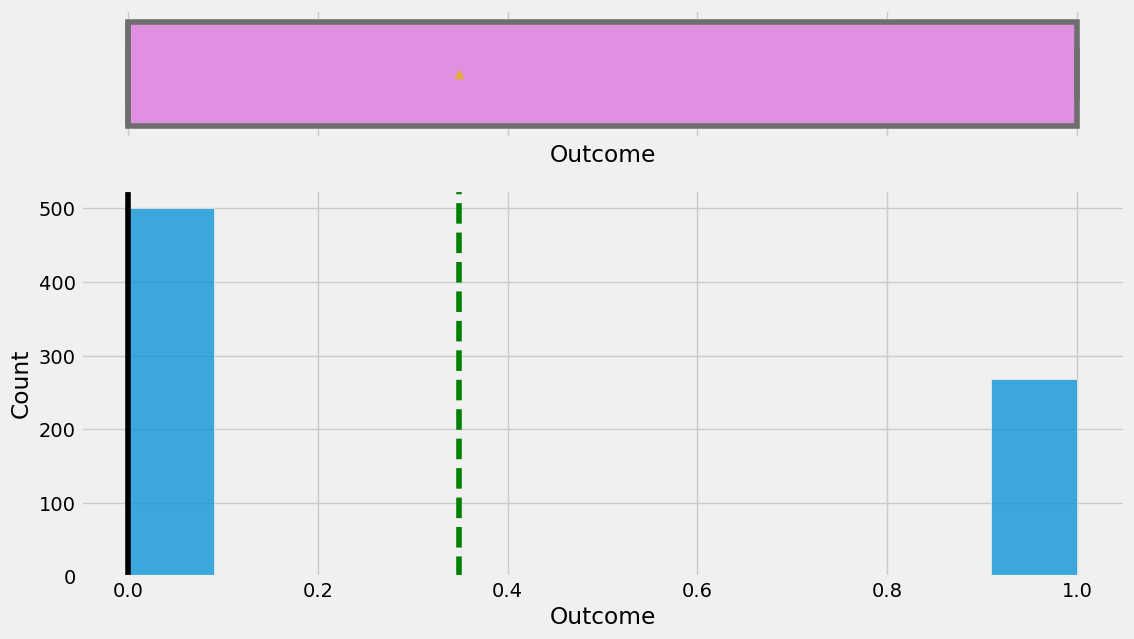

In [25]:
for col in df.select_dtypes(exclude='O').columns:
    boxplot_histplot(df, col)

**Observations**
1. We see that Pregnancies, Insulin, Dpf and Age are huighly right skewed
2. Wee see that Outcome is highly imbalanced
3. We see that skin thickness, insulin and Dpf have very high amount of outliers 

**Bivariate Analysis**

In [26]:
def catnum(data, feature1, feature2):
    print("The Bivariate barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar', color='orange')
    plt.show()

The Bivariate barchart between Outcome and Pregnancies


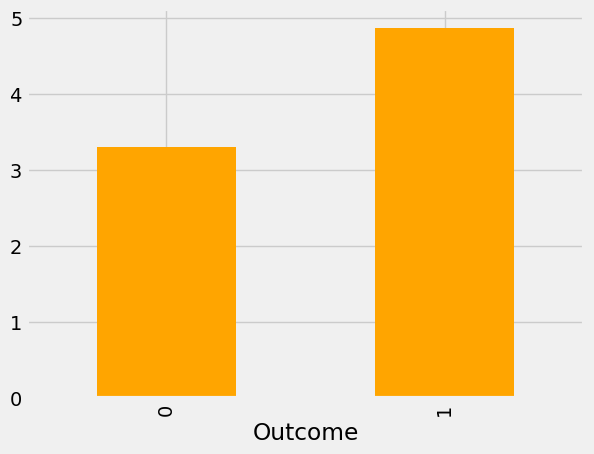

The Bivariate barchart between Outcome and Glucose


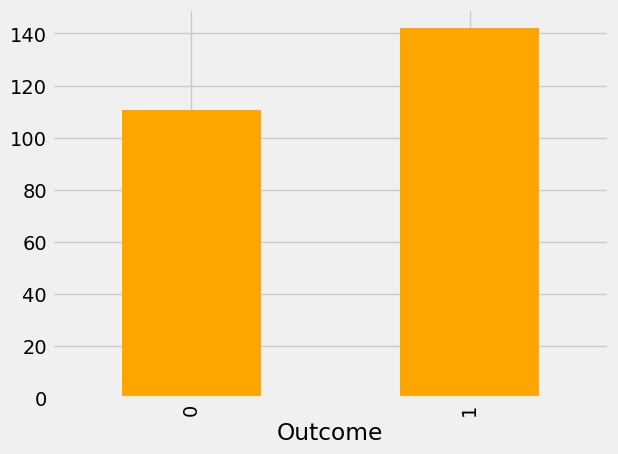

The Bivariate barchart between Outcome and BloodPressure


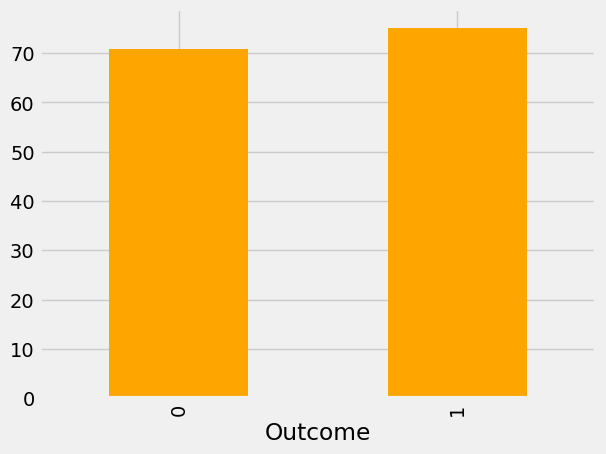

The Bivariate barchart between Outcome and SkinThickness


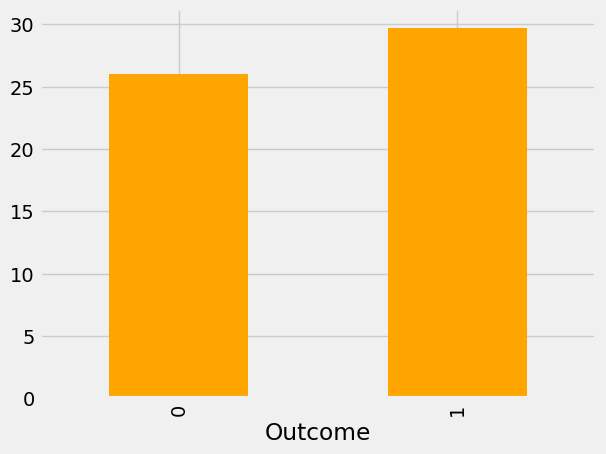

The Bivariate barchart between Outcome and Insulin


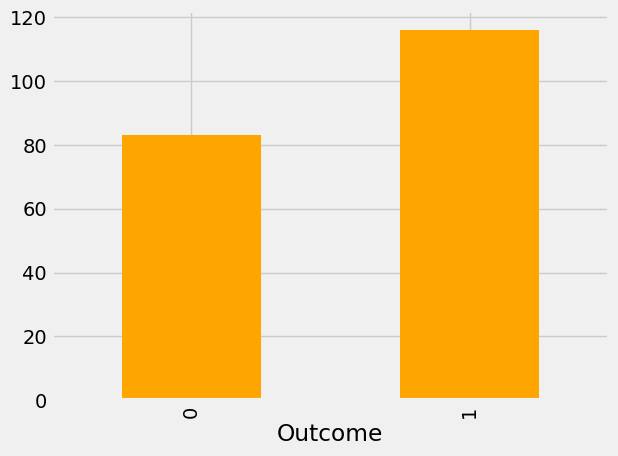

The Bivariate barchart between Outcome and BMI


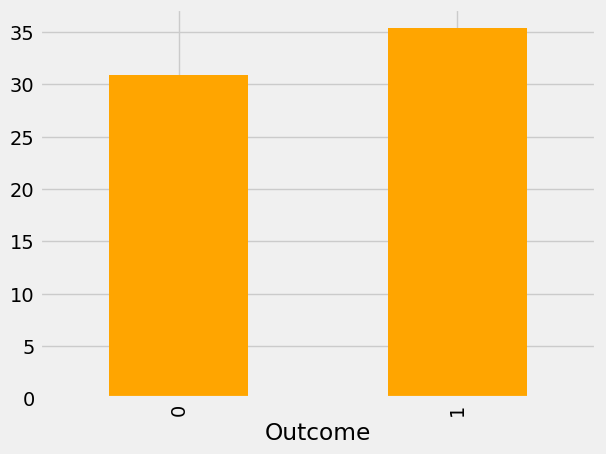

The Bivariate barchart between Outcome and DiabetesPedigreeFunction


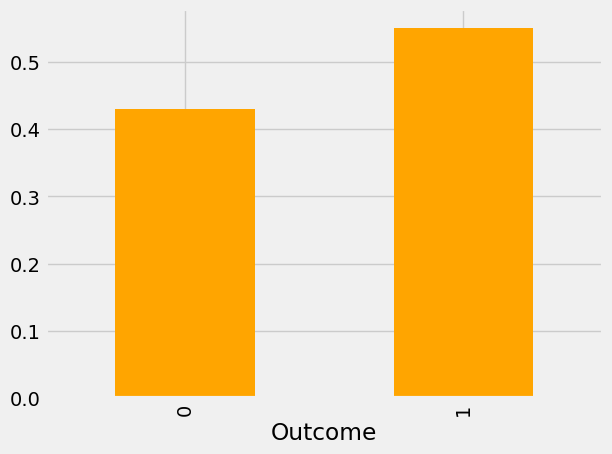

The Bivariate barchart between Outcome and Age


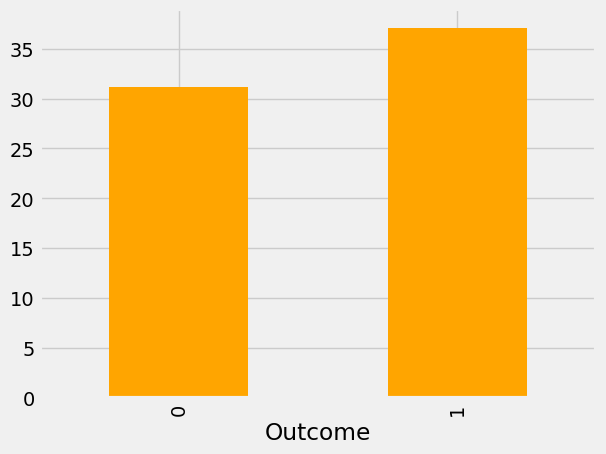

The Bivariate barchart between Outcome and Outcome


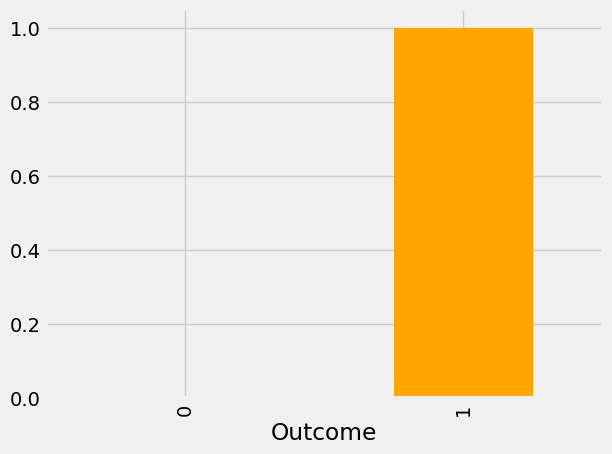

In [27]:
for col in df.select_dtypes(exclude='O').columns:
    catnum(df,'Outcome' ,col)

**Observation**
The graphs show that women with higher no.of pregnancies, hiugher glucose level, higher insulin level , higher dpf and age are more likely tobe diabetic |

In [28]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    print("Bivariates between {0} and {1}".format(feature1, feature2))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.title('Lineplot')
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='blue')
    plt.title('Scatterplot')
    plt.show()
    

Bivariates between Age and Pregnancies


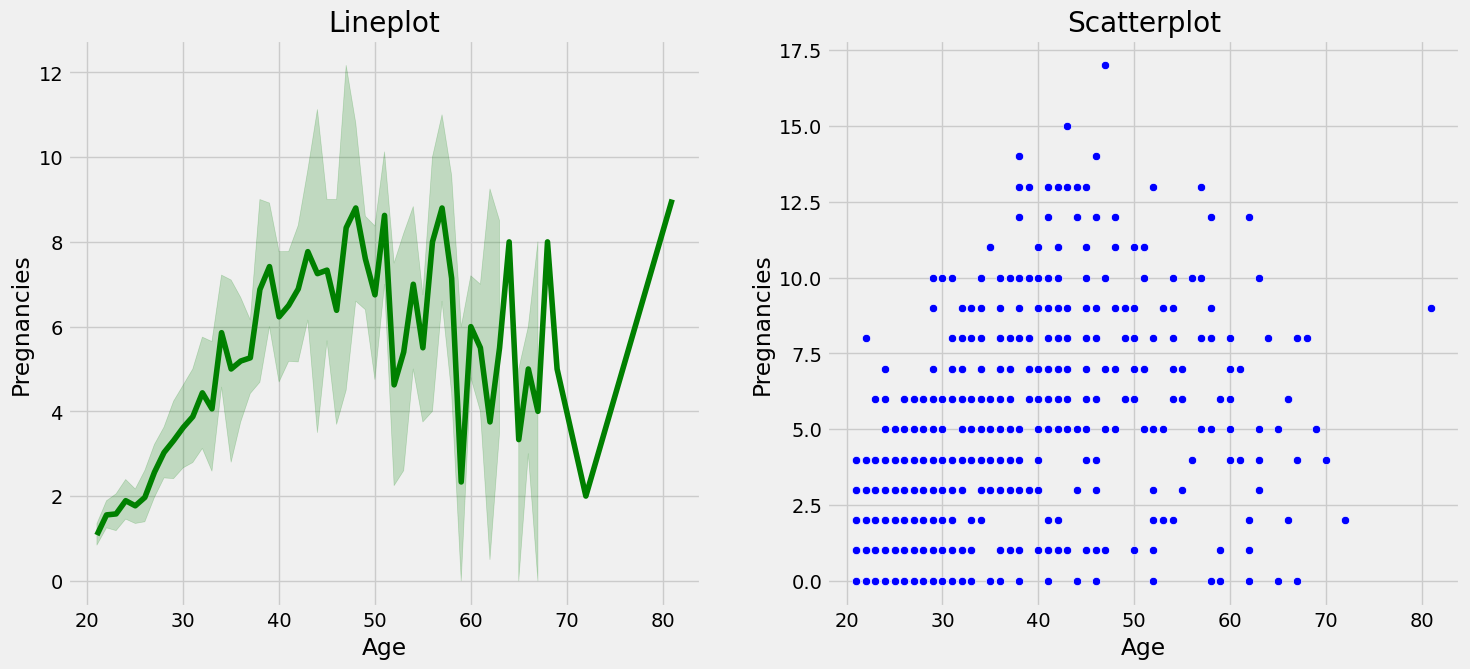

Bivariates between Age and Glucose


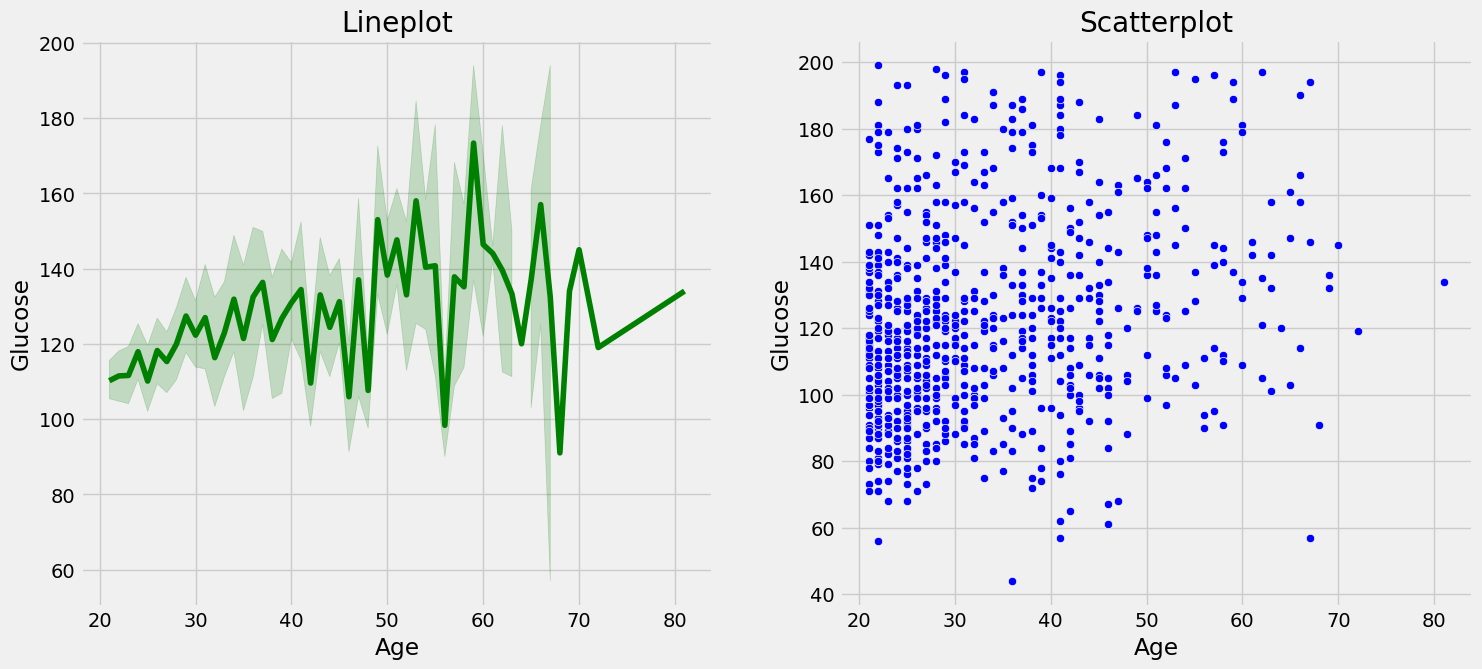

Bivariates between Age and BloodPressure


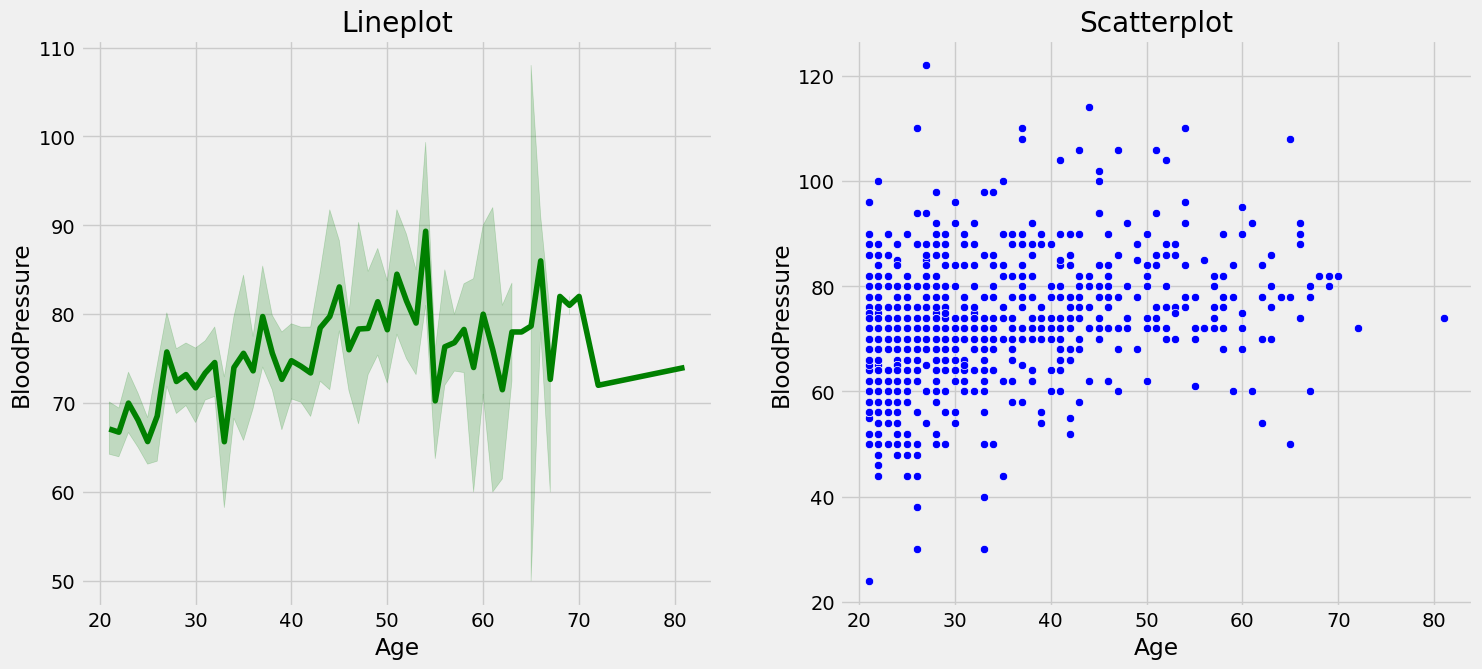

Bivariates between Age and SkinThickness


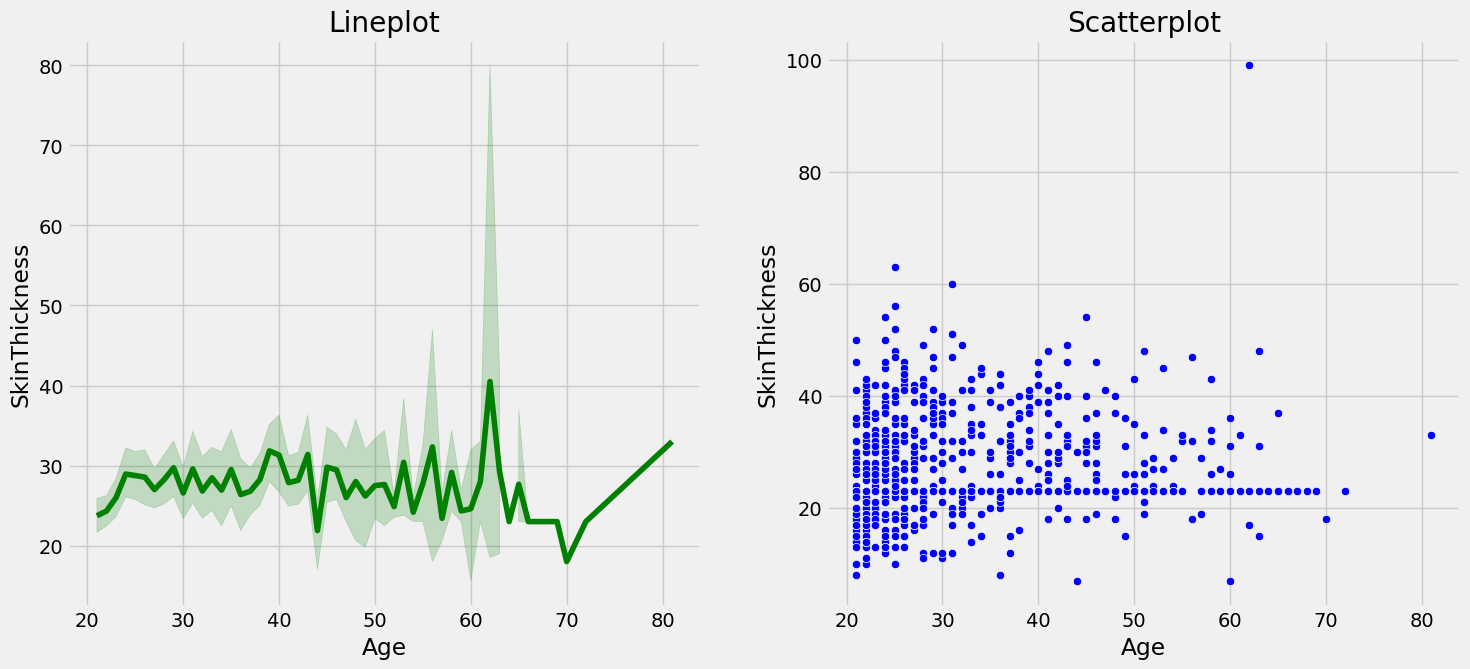

Bivariates between Age and Insulin


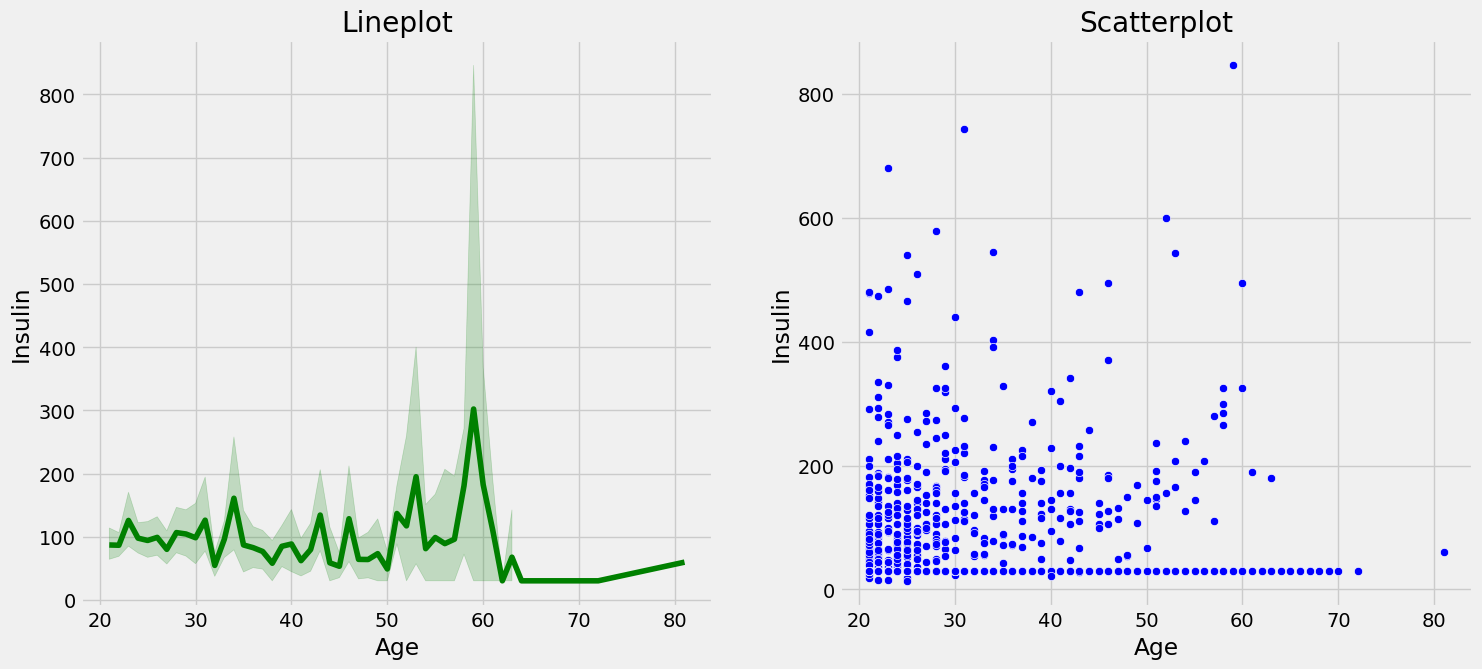

Bivariates between Age and BMI


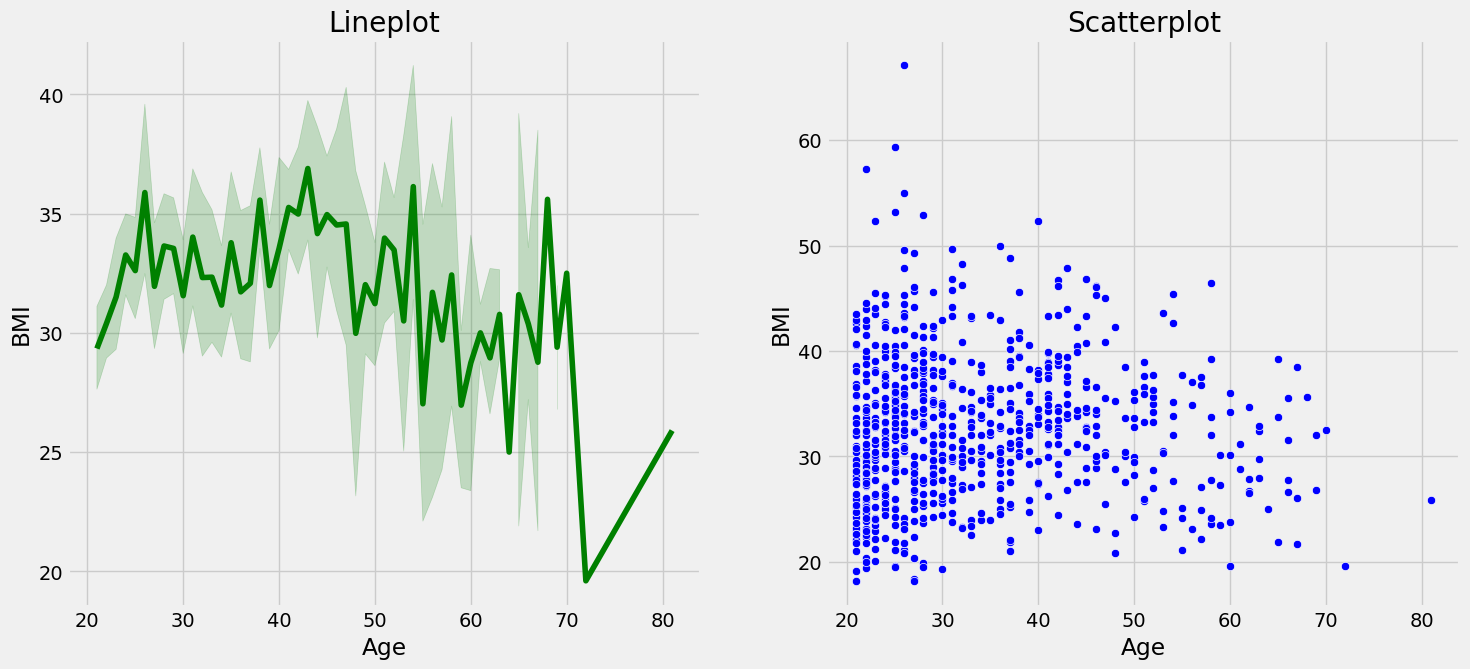

Bivariates between Age and DiabetesPedigreeFunction


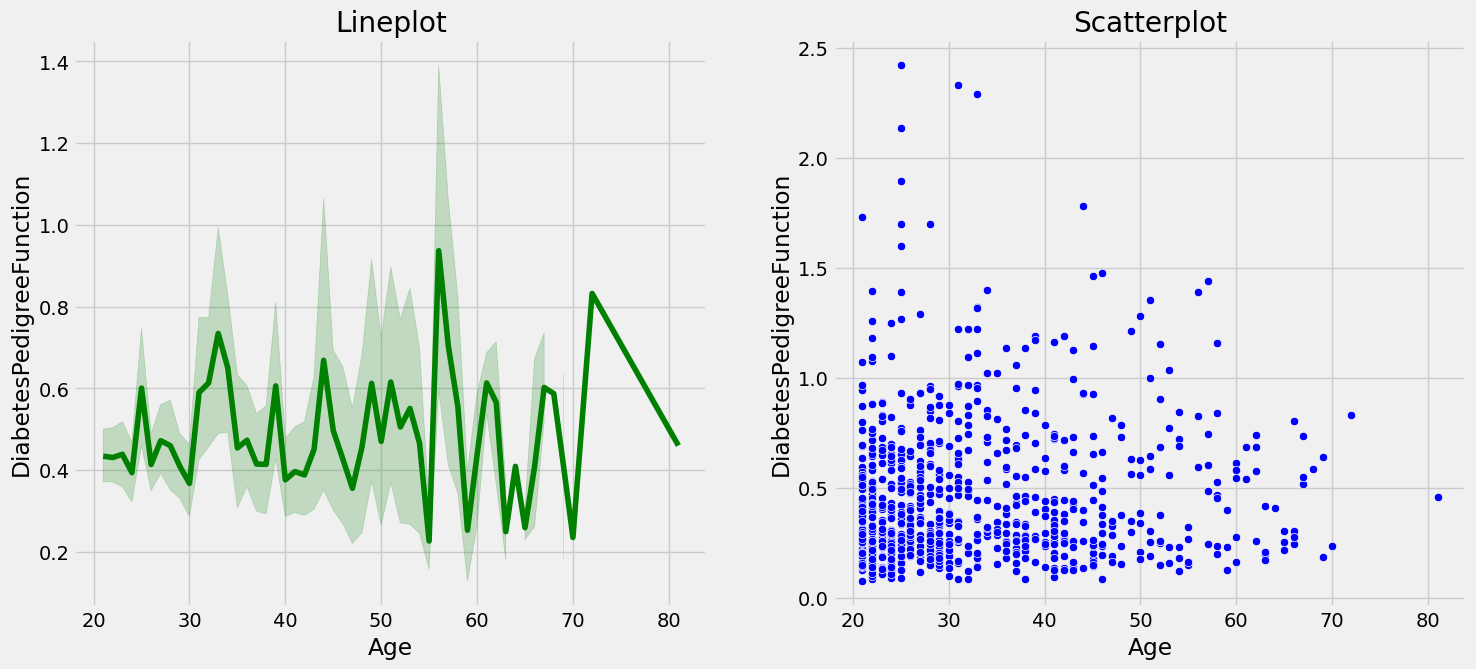

Bivariates between Age and Age


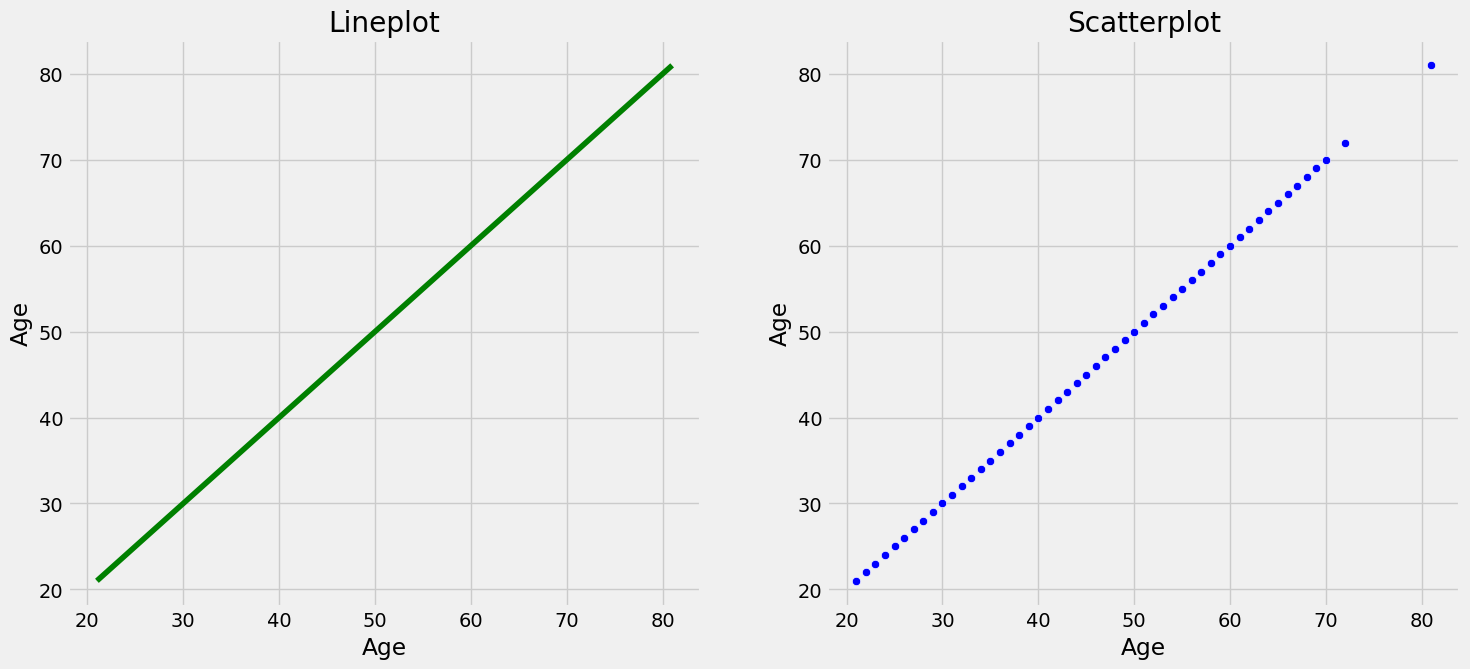

Bivariates between Age and Outcome


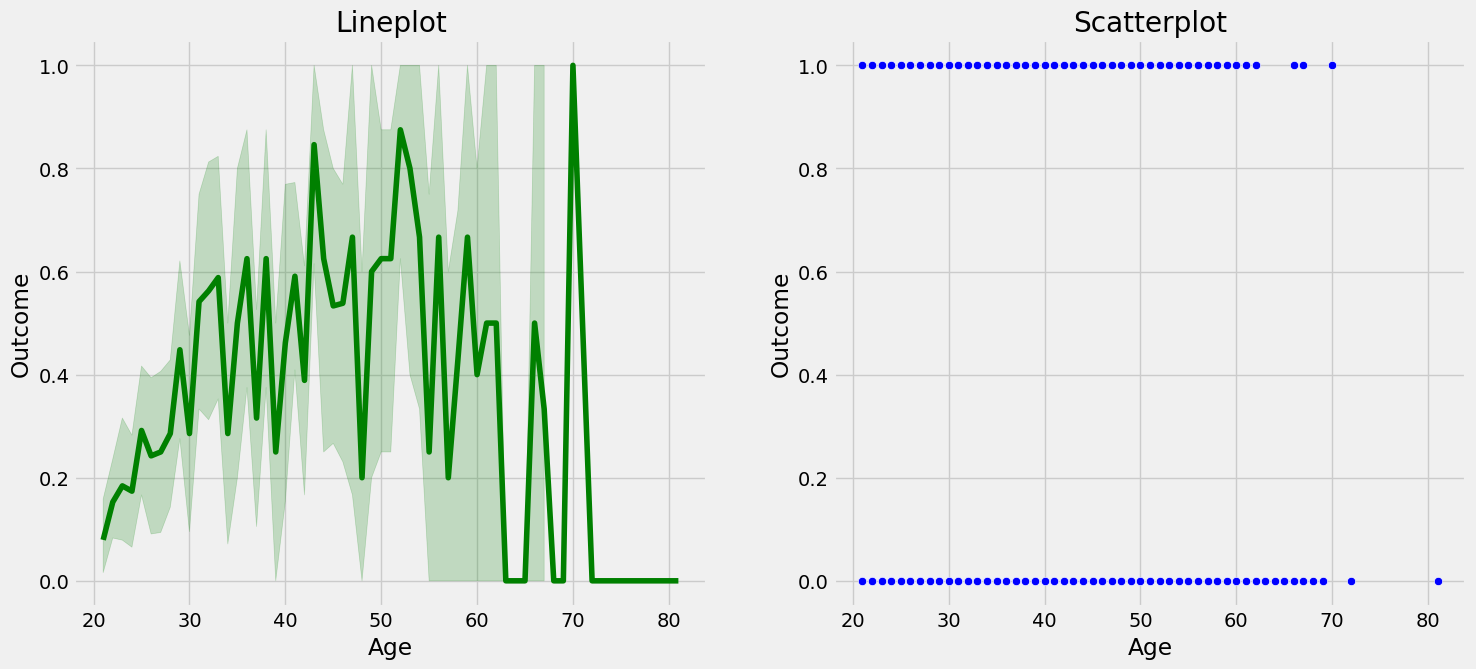

In [29]:
for col in df.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=df,feature1='Age', feature2=col)
    

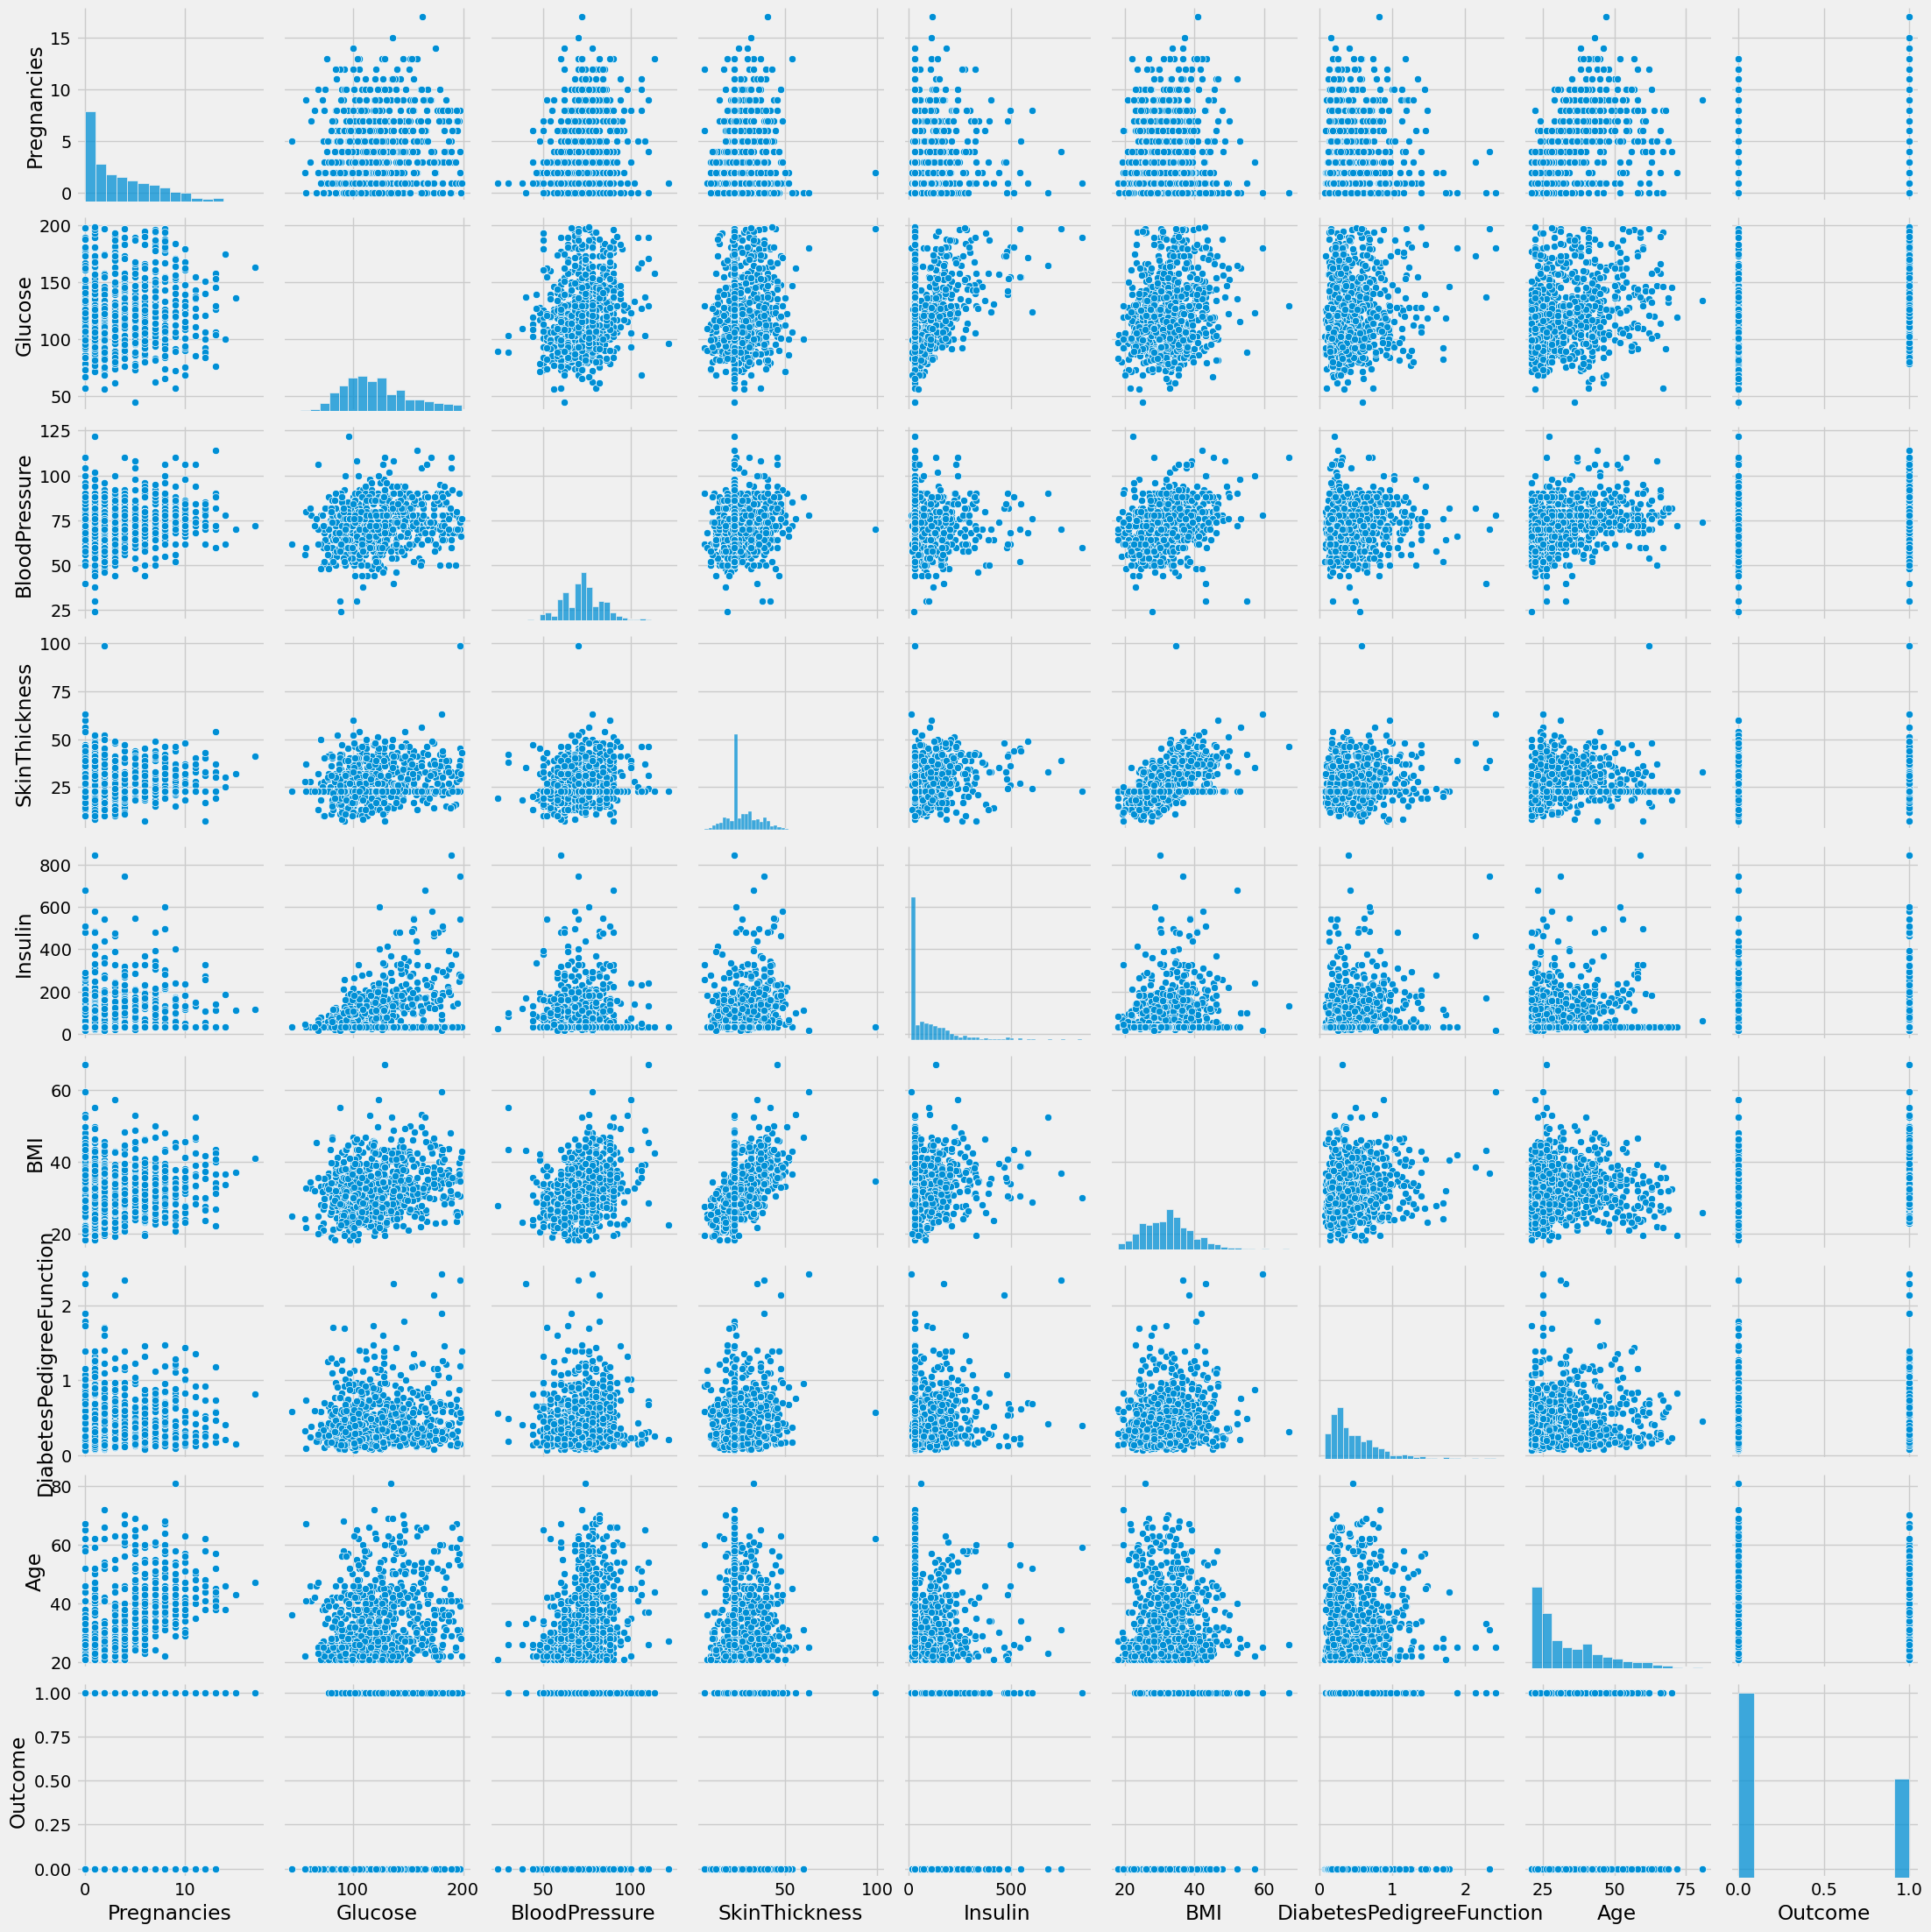

In [30]:
sns.pairplot(df)

**Observations**
There appears multicollinearity between Glucose and Insulin, BMI and skin thickness

In [31]:
# Lets look at variables most correlated with Outcome 
df[df.columns[:]].corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot: >

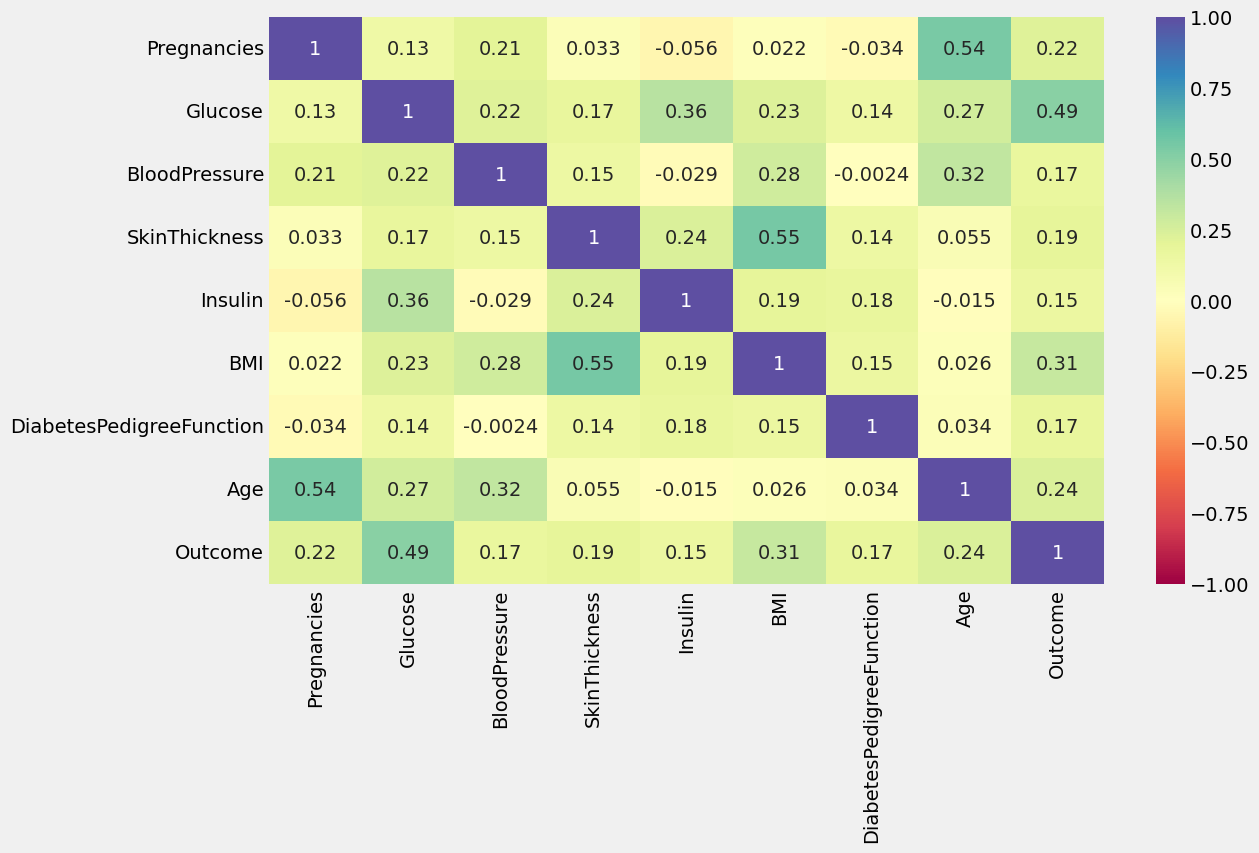

In [32]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)

**Observations**
Glucose and BMI are the strongest predictors of Outcome 

Lets create an app top display these charts 

In [33]:
#!pip install streamlit

In [34]:
%%writefile eda.py
import streamlit as st
st.title("The EDA Page")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
st.set_option('deprecation.showPyplotGlobalUse', False)
plt.style.use('fivethirtyeight')

#load and clean the data
data=pd.read_csv("data/data.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
zerofiller=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, 0)
# encode the categorical outcome variable
df=data.copy()
d={"Yes":1, 'No':0}
df['Outcome']=df['Outcome'].map(d)
def view_data(data):
    st.write(df.head(10))
    st.pyplot()

def histograms(df):
    df.hist()
    plt.tight_layout()
    st.pyplot()
    
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    st.pyplot()
    
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    st.pyplot()
    
st.sidebar.subheader("Choose the Plot")
plot=st.sidebar.selectbox('plot', ('Data', 'Histograms', 'Barchart', 'Boxplot_Scatterplot', 'Correlations'))

if st.sidebar.button('PLOT'):
    if plot=='Data':
        view_data(df)
    if plot=='Histograms':
        histograms(df)
    if plot=='Barchart':
        barplot(df, feature='Outcome')
    if plot=='Boxplot_Scatterplot':
        for col in df.select_dtypes(exclude='O').columns:
            boxplot_histplot(df, col)
    if plot=='Correlations':
        plt.figure(figsize=(12,7))
        sns.heatmap(df.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)
        st.pyplot()
        
        
        
        

Writing eda.py


Pregnancies
0.9016739791518588


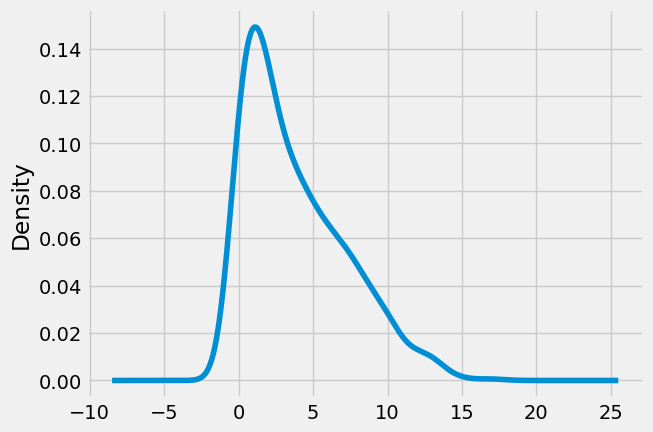

Glucose
0.5355873034111183


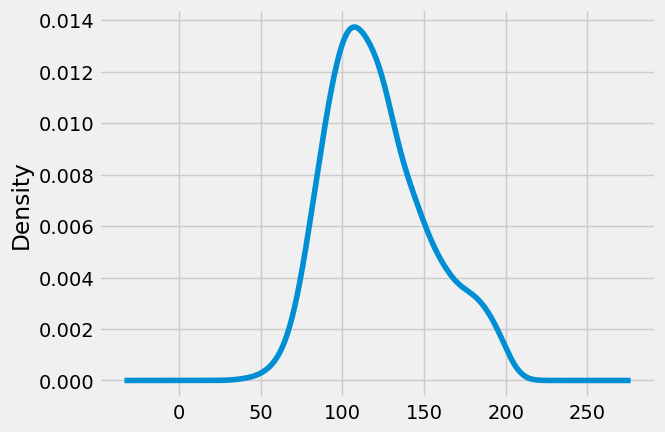

BloodPressure
0.1418850201030565


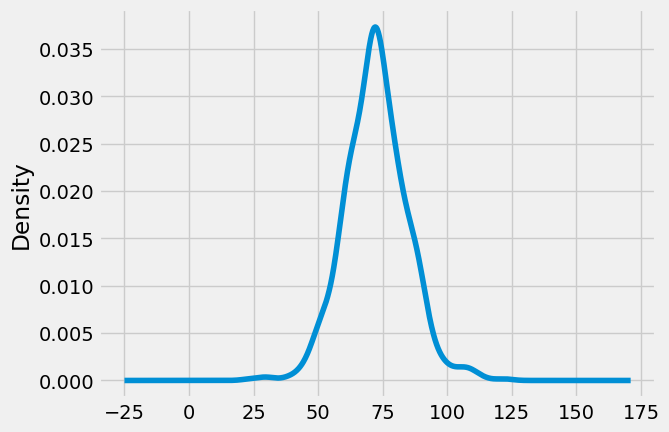

SkinThickness
1.2230571171743103


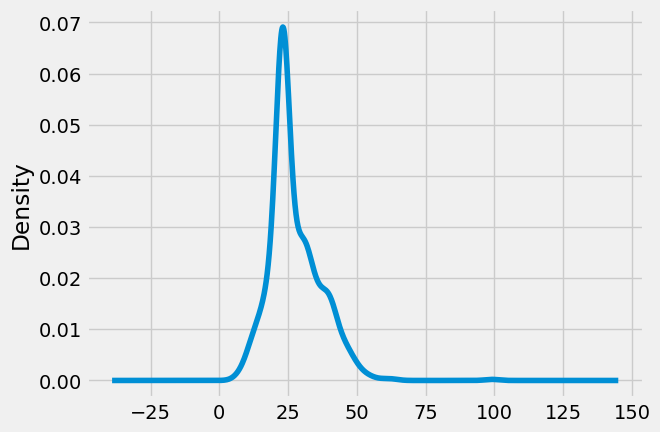

Insulin
2.693180713015471


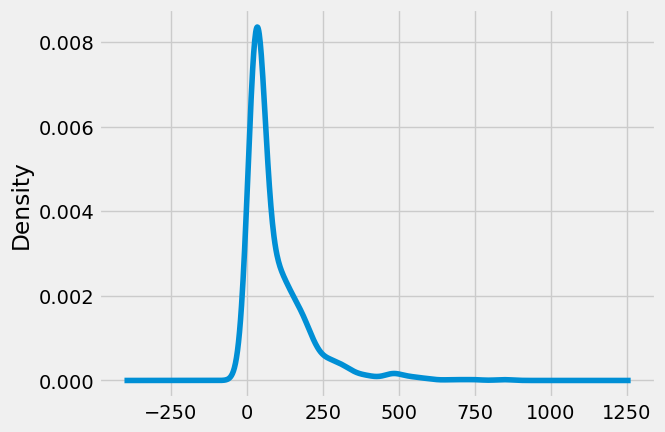

BMI
0.6010587212883255


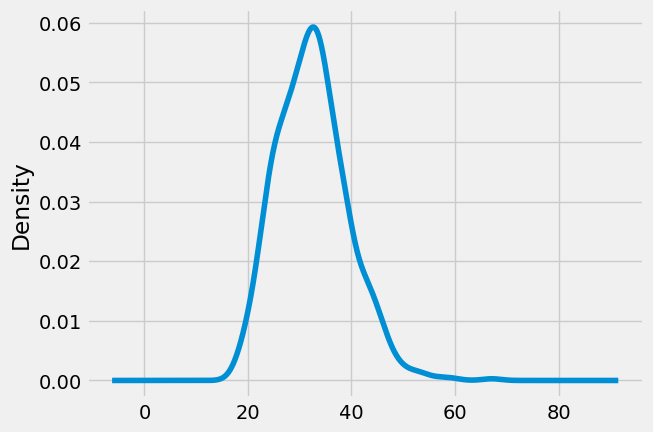

DiabetesPedigreeFunction
1.919911066307204


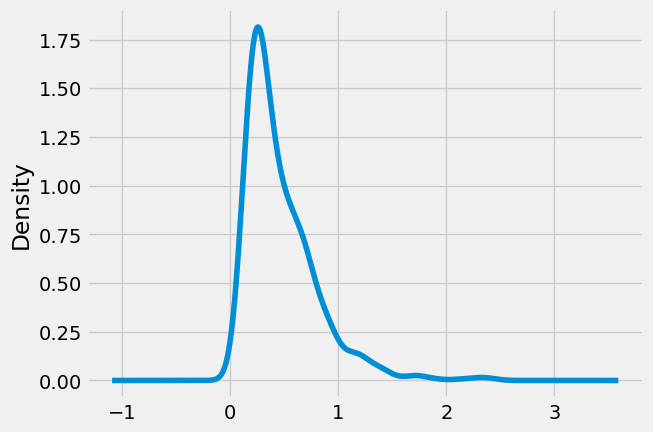

Age
1.1295967011444805


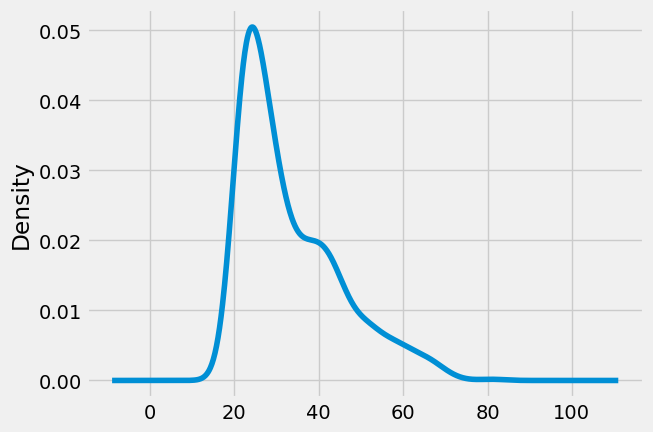

Outcome
0.635016643444986


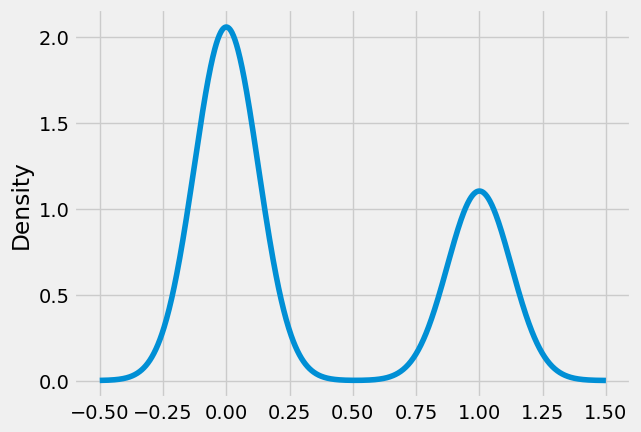

In [54]:
for col in df.columns:

    print(col)
    print(df[col].skew())
    plt.show()
    
    df[col].plot(kind='kde')
    plt.show()

In [56]:
from xgboost import XGBClassifier

In [57]:
model = LogisticRegression()

In [59]:
target = data['Outcome']
features = data.drop(columns='Outcome',axis=1)

In [60]:
xtrain,xtest,ytrain,ytest = train_test_split(features,target,train_size=.7,random_state=42)

In [61]:
model = model.fit(xtrain,ytrain)

In [62]:
predict = model.predict(xtest)

In [64]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Preprocessing == separate features and label
# impute nulls if remaining
# encode categoricals
# solve for data imbalance -- in the target?
# train test split
# standard scaling -- done only on the features NOT on the label

In [66]:
#create a function to do the preprecessing

def preprocess(data,label):
    #separate features and label
    x = df.drop(label,axis=1)
    y = df[label]

    #solve for data imbalance

    sm = SMOTE()
    x,y = sm.fit_resample(x,y)

    #split
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=42)
    return xtrain,xtest,ytrain,ytest


In [68]:
xtrain,xtest,ytrain,ytest = preprocess(df,'Outcome')

In [71]:
#scale the features
#xtest is transformed on the fit done on xtrain

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [73]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(700, 8) (700,) (300, 8) (300,)


In [76]:
#completed preprocessing --  data ready for medelling

#Next, fit and evaluate models

from sklearn.metrics import accuracy_score,f1_score,precision_score,roc_auc_score,recall_score,confusion_matrix,classification_report

from sklearn.metrics import accuracy_score

In [91]:
#create evaluation function

def print_metrics(ytest,ytest_pred,model_name):
    print('metrics for this model: model_name')
    print(' ')
    print('Accuracy score:', accuracy_score(ytest,ytest_pred) )
    print('recall score', recall_score(ytest,ytest_pred))
    print('f1_score', f1_score(ytest,ytest_pred))
    print(confusion_matrix(ytest,ytest_pred))
    print(f'classification report {classification_report(ytest,ytest_pred)}')



In [80]:
def plot_metric(clf, xtest,ytest,model_name):
    print('metrics for model')
    plot_confusion_matrix(clf,xtest,ytest,display_labels=[0,1])
    print(' ')
    plot_roc_curve(clf,xtest,ytest)
    print(' ')
    plot_precision_recall_curve(clf,xtest,ytest)
    

In [86]:
#fit knn

model = KNeighborsClassifier()
model = model.fit(xtrain,ytrain)

In [87]:
ytest_pred = model.predict(xtest)

metrics for this model: model_name
 
Accuracy score: 0.5033333333333333
recall score 1.0
f1_score 0.6696230598669622
[[  0 149]
 [  0 151]]
classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.50      1.00      0.67       151

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.34       300

metrics for model
 
 


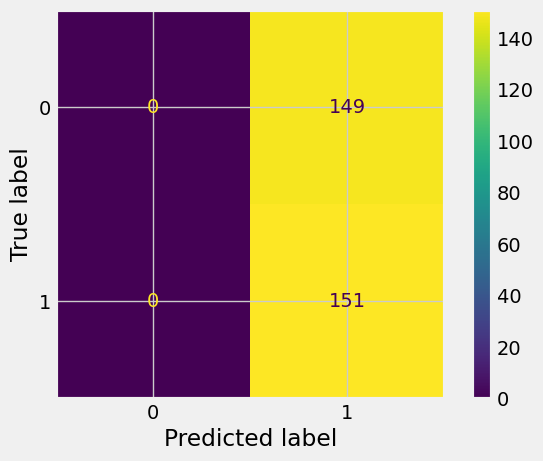

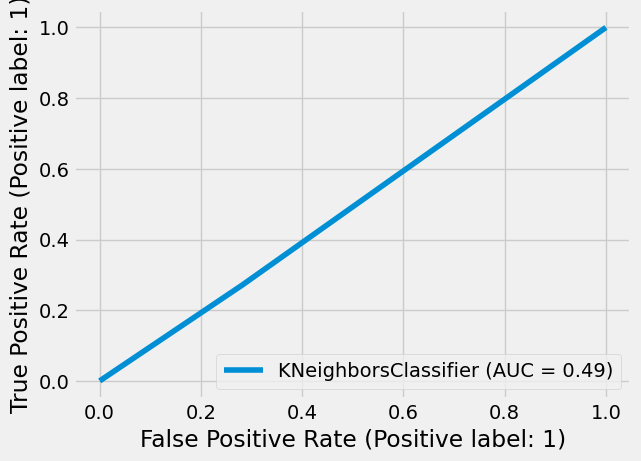

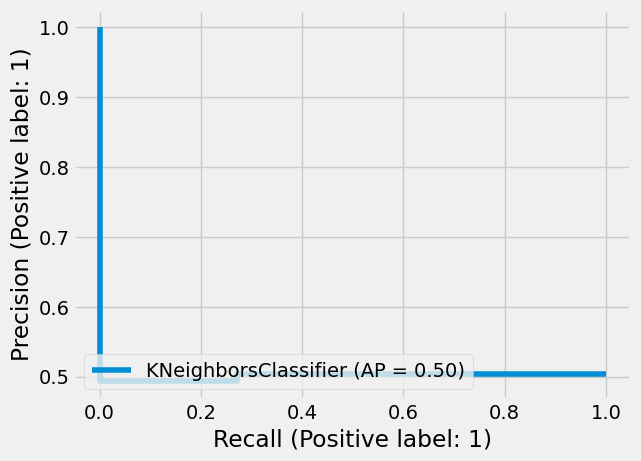

In [92]:
print_metrics(ytest,ytest_pred,model)
plot_metric(model,xtest,ytest,'knn')

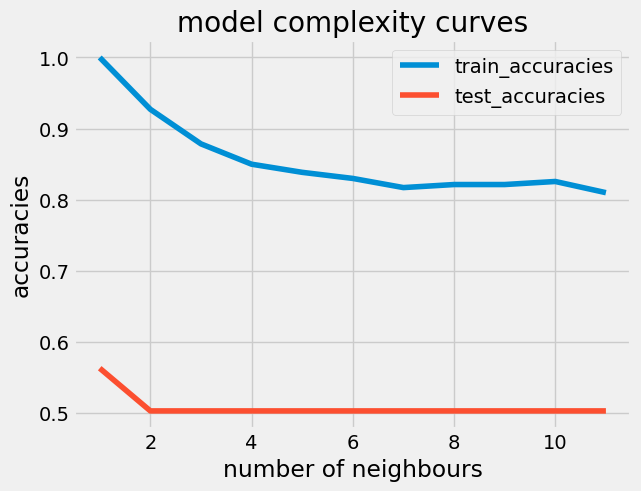

In [96]:
#tuning the knn hyperparameter k

neighbours = np.arange(1,12)
train_accuracies = (np.empty(len(neighbours)))
test_accuracies = (np.empty(len(neighbours)))

for i,k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    train_accuracies[i]=knn.score(xtrain,ytrain)
    test_accuracies[i]=knn.score(xtest,ytest)
    plt.show()

#plot the model complexity curves

plt.title('model complexity curves')
plt.plot(neighbours,train_accuracies,label='train_accuracies')
plt.plot(neighbours,test_accuracies,label = 'test_accuracies')
plt.legend()
plt.xlabel('number of neighbours')
plt.ylabel('accuracies')
plt.show()

In [103]:
#refit knn with k=8

knn = KNeighborsClassifier(n_neighbors=8)
knn = knn.fit(xtrain,ytrain)
print(knn.score(xtrain,ytrain))
print(knn.score(xtest,ytest))
ytest_pred = knn.predict(xtest)



0.8214285714285714
0.5033333333333333


In [110]:
#lets fit all the models at once and decide the one to optimize

clfs = {'logreg':LogisticRegression(),
       'knn':KNeighborsClassifier(),
       'NB': GaussianNB(),
       'DecisionTree': DecisionTreeClassifier(),
       'RF':RandomForestClassifier(),
       'AdaB':AdaBoostClassifier(),
       'GradientB':GradientBoostingClassifier(),
       'XGB':XGBClassifier(),
       'svc':SVC()}

model_reports = pd.DataFrame(columns=['model','accuracy','recall','precision','f1'])

In [118]:
for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(xtrain,ytrain)
    ytest_pred = clf.predict(xtest)
    print(f'fitting model {clf_name}')
    t=pd.Series({
        'model':clf_name,
        'accuracy':accuracy_score(ytest,ytest_pred),
        'recall':recall_score(ytest,ytest_pred),
        'precision':precision_score(ytest,ytest_pred),
        'f1':f1_score(ytest,ytest_pred)
    })
    model_reports = model_reports.append(t,ignore_index=True)

model_reports = model_reports.sort_values(by='f1',ascending=False)


fitting model logreg
fitting model knn
fitting model NB
fitting model DecisionTree
fitting model RF
fitting model AdaB
fitting model GradientB
fitting model XGB
fitting model svc


In [119]:
print(model_reports)

           model  accuracy    recall  precision        f1
0         logreg  0.503333       NaN   0.503333  0.669623
1            knn  0.503333       NaN   0.503333  0.669623
15     GradientB  0.503333  1.000000   0.503333  0.669623
14          AdaB  0.503333  1.000000   0.503333  0.669623
12  DecisionTree  0.503333  1.000000   0.503333  0.669623
11            NB  0.503333  1.000000   0.503333  0.669623
10           knn  0.503333  1.000000   0.503333  0.669623
9         logreg  0.503333  1.000000   0.503333  0.669623
5      GradientB  0.503333       NaN   0.503333  0.669623
4           AdaB  0.503333       NaN   0.503333  0.669623
3   DecisionTree  0.503333       NaN   0.503333  0.669623
2             NB  0.503333       NaN   0.503333  0.669623
7            XGB  0.500000       NaN   0.501672  0.666667
6             RF  0.500000       NaN   0.501672  0.666667
16           XGB  0.500000  0.993377   0.501672  0.666667
13            RF  0.496667  0.986755   0.500000  0.663697
8            s

In [123]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ytest_pred = rfc.predict(xtest)
print(print_metrics(ytest,ytest,rfc))

metrics for this model: model_name
 
Accuracy score: 1.0
recall score 1.0
f1_score 1.0
[[149   0]
 [  0 151]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       151

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

None


In [126]:
#lets optimize random forest

param_grid = {
    'n_estimators':[100,150,200],
    'min_samples_leaf':range(1,5,1),
    'min_samples_split':range(2,10,2),
    'max_depth':[1,2,3,4,5],
    'max_features':['sqrt','log2'],
    'criterion':['gini','entropy']
}

n_folds = 3

cv=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=n_folds,n_jobs=1,return_train_score=False,verbose=3)

cv.fit(xtrain,ytrain)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.748 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.777 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.760 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.756 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.773 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.747 total time=   0.1s
[CV 1/3] END criterion=g

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 150, 200]},
             verbose=3)

In [127]:
#scikit learn uses gini by default, beause computationally easier thus less expensive
cv.best_score_

0.8057114559260482

In [128]:
cv.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=6, n_estimators=200)

In [130]:
rfc_tuned=cv.best_estimator_
rfc_tuned.fit(xtrain,ytrain)
ytest_pred=rfc_tuned.predict(xtest)

print(print_metrics(ytest,ytest_pred,rfc_tuned))

metrics for this model: model_name
 
Accuracy score: 0.5033333333333333
recall score 1.0
f1_score 0.6696230598669622
[[  0 149]
 [  0 151]]
classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.50      1.00      0.67       151

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.34       300

None


In [131]:
#INTERPRETATION OF MODEL

!pip install shap --user

     -------------------------------------- 435.6/435.6 kB 1.6 MB/s eta 0:00:00


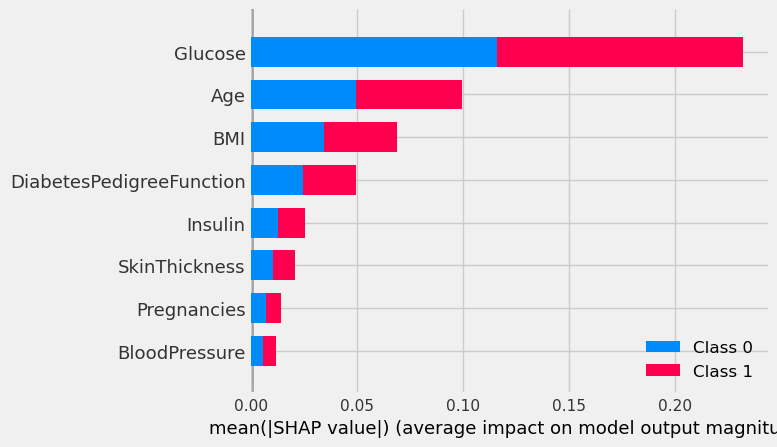

In [135]:
import shap
x=df.drop('Outcome',axis=1)
value=shap.TreeExplainer(rfc_tuned).shap_values(xtest)
shap.summary_plot(value,xtrain,plot_type='bar',feature_names=x.columns)

In [139]:
#CREATE PIPELINE FOR DEPLOYMENT

from sklearn.pipeline import Pipeline
sc=StandardScaler()
rfc_tuned=rfc_tuned
xtrain,xtest,ytrain,ytest = preprocess(df,'Outcome')

steps=[('scaling',sc),('rfc_tuned',rfc)]

#pipeline takes raw data, then scales it. So we need non scaled data here.

pipeline=Pipeline(steps)
pipeline.fit(xtrain,ytrain)
ytest_pred=pipeline.predict(xtest)

print_metrics(ytest,ytest_pred,'Pipeline')

metrics for this model: model_name
 
Accuracy score: 0.7933333333333333
recall score 0.8807947019867549
f1_score 0.8109756097560975
[[105  44]
 [ 18 133]]
classification report               precision    recall  f1-score   support

           0       0.85      0.70      0.77       149
           1       0.75      0.88      0.81       151

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



In [141]:
#pickle the pipeline

import pickle

model = open('rfc.pickle','wb')
pickle.dump(pipeline,model) #dump pipeline inside the model
#model will be created in the pickle format

model.close()

#now ready for deployment

In [148]:
#DEPLOYMENT OF THE PICKLED MODEL
#this will write whatever you write below into a python file

%%writefile app.py 
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
st.title('Medical Diagnostic WebApp ')

UsageError: Line magic function `%%writefile` not found.


In [149]:

%%writefile app.py 
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
st.title('Medical Diagnostic WebApp ')

Writing app.py
